In [1]:
import astropy as ap
import astropy.io.fits as ap_fits
import astropy.modeling as ap_mod
import copy
import glob
import inspect
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as np_ma
import pandas as pd
import scipy as sp
import scipy.optimize as sp_opt
import scipy.stats as sp_stat
import warnings as warn

import IfA_Smeargle as ifas

In [3]:
first_run = ifas.yankee.SmeargleConfig('FirstRun.ifaspkl')

first_run.BravoConfig.voltpat_rename_config['archive_data'] = False
first_run.BravoConfig.detector_name = {'name': 'SAPHIRA-MK20-M12145-03_20191001_T60K'}

print(first_run)


< Configuration Class --- SmeargleConfig > 
╓ SmeargleConfig Parameters:
╟  BravoConfig ↴ 
< Configuration Class --- BravoConfig > 
╓ BravoConfig Parameters:
╟  detector_name ⇀ {'name': 'SAPHIRA-MK20-M12145-03_20191001_T60K'}
╟  voltpat_rename_config ⇀ {'voltage_pattern': [2.5, 4.5, 6.5, 8.5, 9.5, 10.5, 11.5, 11.5, 10.5, 9.5, 8.5, 6.5, 4.5, 2.5], 'begin_garbage': 1, 'archive_data': False}
╟  avg_endpts_persec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╟  avg_endpts_perksec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╙------------------------------------------
</ Configuration Class --- BravoConfig >
╟  EchoConfig ↴ 
< Configuration Class --- EchoConfig > 
╓ EchoConfig Parameters:
╟  echo010_config ⇀ {'run': False}
╟  echo120_config ⇀ {'run': False, 'x_range': None, 'y_range': None}
╟  echo170_config ⇀ {'run': True, 'sigma_multiple': 5, 'bin_size': 5}
╟  echo270_config ⇀ {'run': False, 'minimum_value': None}
╟  echo

In [4]:
ifas.zulu.pipelines.SA201907281826_reduction_pipeline('./Data',first_run)

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:73: DataWarning: This a 3D data frame with nan/null values. Frames with nan/null values have been completely nulled.
  smeargle_warning(DataWarning,("This a 3D data frame with 

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_f

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extensio

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extensio

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extensio

In [ ]:
__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data/Saphria__num;19__detBias;8.5Vup__1025-1040.fits")

In [ ]:
data
print(np.nanmean(data.data),np.nanstd(data.data))

In [ ]:
first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-1000,1000]

figure = ifas.oscar.multi.plot_single_heatmap_and_histogram("./Data\Saphria__num;14__detBias;4.5Vdown__1025-1040.fits",first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure)

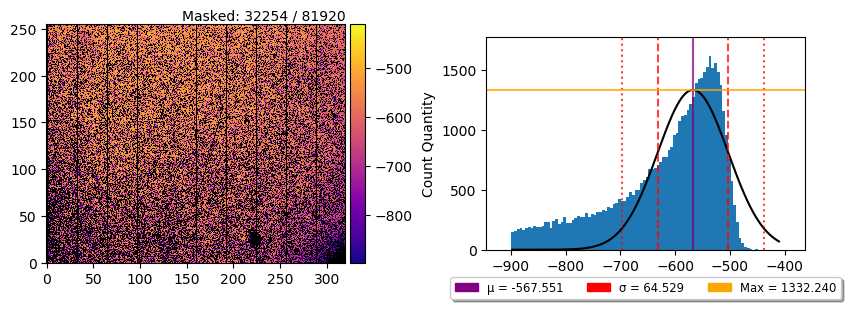

NameError: name 'figure3' is not defined

In [6]:
first_run.OscarConfig.general_histogram_config['fit_gaussian'] = True
#first_run.OscarConfig.general_histogram_config['bin_width'] = 5
#first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-250,100]

__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data/SAPHIRA-MK12145-02_20190913-40K__num;7__detBias;10.5Vup__slice;513-528.fits")
figure2 = ifas.oscar.multi.plot_single_heatmap_and_histogram(data,first_run)
#figure3 = ifas.oscar.multi.plot_single_heatmap_and_histogram(data.data,first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure2)
plt.show(figure3)

# [ 72 120 136 250 294]
#[-16074. -14058. -13386.  -8598.  -6750.]
ifas.meta.meta_plting.smeargle_save_figure_file(figure2,"website.png")
print(np.histogram(data.data,bins=10))

In [ ]:
__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data\Saphria__num;14__detBias;4.5Vdown__257-272.fits")
figure2 = ifas.oscar.histograms.plot_array_histogram(data.data,bin_width=10,fit_gaussian=True)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure2)

wee, weer = ifas.meta.meta_model.smeargle_fit_histogram_gaussian_function(data.data)

print(np.nanstd(data))

In [ ]:
# Extract histogram data from the data.
hist_data = np.histogram(data.data, bins=ifa.oscar.oscar_bin_width(data.data, 10))
hist_x = (hist_data[1][0:-1] + hist_data[1][1:]) / 2 # Middle of bin.
hist_y = hist_data[0]
   # Filter out some of the outlier pixels, consider only 75% of the 
    # meaningful bins and the bins with a value greater than a limiting entry.
valuecut_index = np.where(hist_y >= 11)
cuthist_x = np.array(hist_x[valuecut_index])
cuthist_y = np.array(hist_y[valuecut_index])

    # Initial guesses...
    # The peak of the data is a good guess for the mean value.
guess_mean = hist_x[np.argmax(cuthist_y)]
print(np.nanstd(cuthist_y))
print(sp_stat.median_absolute_deviation(cuthist_y))
print(sp_stat.variation(cuthist_y))

In [3]:
ifas.bravo.sanitize.same_file_size_sanitization('./Data')

471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
471862080 471862080 True
[]


In [5]:
glob.glob('./Data*.fits')

[]

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\bravo\renaming.py:49: InputWarning: The filename has been marked as garbage. The splitting will yield good or bad information about a bad data set. Nothing will be done.
  smeargle_warning(InputWarning,("The filename has been marked as garbage. The splitting "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\modeling_and_fitting.py:162: DataWarning: Nyquist peaks cannot be found, relying on 1-bin wide peaks for estimates. Estimates may be very off.
  smeargle_warning(DataWarning,("Nyquist peaks cannot be found, relying on 1-bin "


(-250, 250)

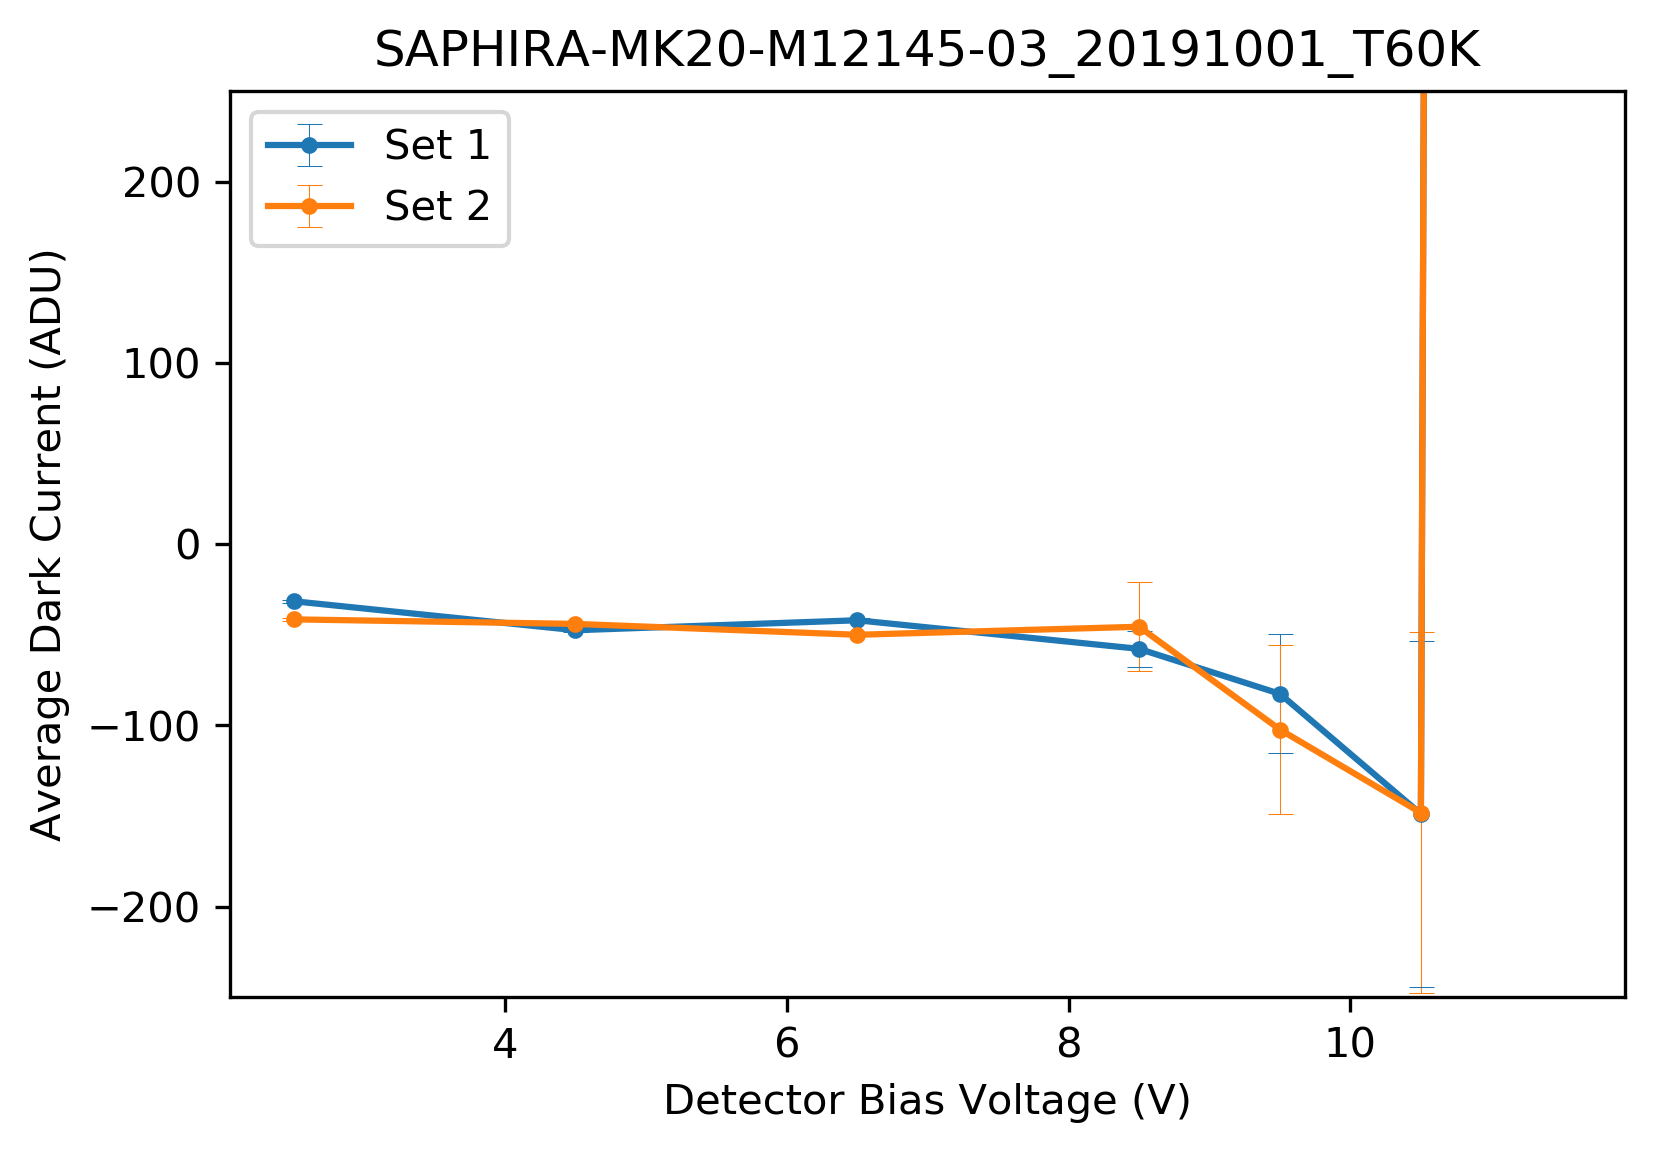

In [5]:
fig, ax = plt.subplots(dpi=300)
ax, data_frame = ifas.oscar.volt_plot.dark_current_over_voltage('./Data/', figure_axes=ax)

#ax.set_yscale('log')
ax.set_ylim((-250,250))

In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(file_data)

,botslice,detector,filename,g_amp,g_max,g_mean,g_stddev,mean,median,num,stddev,topslice,volt,voltslope
0,1040,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;10...,104105.256398,43.715385,4.502857e+05,1.141843e+05,-12589.679495,-10974.0,10,8505.729488,1025,10.5,down
1,272,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;10...,670264.226547,210.697639,4.633891e+04,1.163680e+04,-3157.125255,-2219.0,10,2559.930281,257,10.5,down
2,528,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;10...,16101.051650,112.006818,6.151695e+04,1.952020e+04,-4787.086905,-3712.0,10,3474.736011,513,10.5,down
3,1040,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;11...,738222.027492,316.741108,2.716132e+04,7.037921e+03,-2272.035152,-1665.0,11,1618.834116,1025,9.5,down
4,272,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;11...,1305.809244,1058.110318,2.096983e+01,6.012523e+02,-1037.101059,-721.0,11,753.183574,257,9.5,down
5,528,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;11...,436549.570248,592.321940,1.257793e+04,3.588964e+03,-1487.183657,-1082.0,11,1024.075525,513,9.5,down
6,1040,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;12...,1382.444442,1382.444402,-6.809072e+02,1.272568e+02,-811.641728,-737.0,12,223.677183,1025,8.5,down
7,272,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;12...,4811.514829,4811.514646,-4.603188e+02,3.686516e+01,-486.990412,-471.0,12,56.418075,257,8.5,down
8,528,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;12...,2628.699334,2628.699319,-5.656125e+02,6.673319e+01,-617.138113,-587.0,12,100.147425,513,8.5,down
9,1040,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;13...,4237.250535,4237.250319,-6.121328e+02,4.677278e+01,-643.099908,-624.0,13,68.821695,1025,6.5,down


In [37]:
voltage_value = 4.5
voltage_slope = 'up'
file_data.query('volt == @voltage_value and voltslope == @voltage_slope')



,botslice,detector,filename,g_amp,g_max,g_mean,g_stddev,mean,median,num,stddev,topslice,volt,voltslope
21,1040,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;17...,18993.722888,18993.655015,-477.745964,16.093937,-480.369158,-479.0,17,17.511966,1025,4.5,up
22,272,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;17...,23189.000000,23188.583222,-429.000000,1.348192,-428.699361,-428.0,17,13.911522,257,4.5,up
23,528,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;17...,20868.000000,20857.631919,-462.000000,1.473730,-465.537039,-465.0,17,15.587398,513,4.5,up
66,1040,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;3_...,33850.000000,33824.646531,-122.000000,0.872934,-121.473141,-120.0,3,9.147636,1025,4.5,up
67,272,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;3_...,41649.000000,41647.086863,-96.000000,0.783781,-93.445430,-93.0,3,6.253415,257,4.5,up
68,528,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;3_...,40585.000000,40566.878376,-107.000000,0.765885,-111.157833,-111.0,3,7.294574,513,4.5,up


In [7]:
file_data['detector'][0]

'SAPHIRA-MK12145-02_20190913-40K'

In [39]:
dataframe.query('volt == @voltage_value and voltslope == @voltage_slope')['num']

21    17
22    17
23    17
66     3
67     3
68     3
Name: num, dtype: int64

In [41]:
voltage_list = copy.deepcopy(np.sort(np.unique(file_data.loc[:,'volt'].to_numpy())))

set_metadata = []
#slope_list = list(set(dataframe.query('volt == @voltage_value')['voltslope']))

for voltdex in voltage_list:
    slope_list = list(set(file_data.query('volt == @voltdex')['voltslope']))
    
    for slopedex in slope_list:
        query = file_data.query('volt == @voltdex and voltslope == @slopedex')['num']
        filenum = np.sort(np.unique(query))
        
        for numdex, setdex in zip(filenum,np.arange(len(filenum))+1):
            temp_dict = {'metavolt':voltdex,'metaslope':slopedex,'metanum':numdex,'metaset':setdex}
            set_metadata.append(temp_dict)
            
set_metadata = pd.DataFrame(set_metadata)

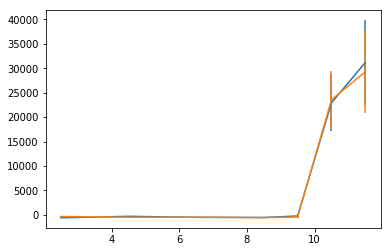

In [99]:
set_count = np.flip(np.unique(set_metadata['metaset']))[np.flip(np.unique(set_metadata['metaset'],return_counts=True)[1]).argmax()]

for setdex in (np.arange(set_count) + 1):
    dataset_list = set_metadata.query('metaset == @setdex')
    
    x_axis_voltage = []
    y_axis_data = []
    y_axis_error = []
    
    for voltdex in voltage_list:
        fits_file_numbers = list(dataset_list.query('metavolt == @voltdex')['metanum'].to_numpy())
        voltset_data = file_data.query('num == @fits_file_numbers')
        
        x_axis_voltage.append(voltdex)
        y_axis_data.append(np.nanmedian(voltset_data['g_mean']))
        y_axis_error.append(np.nanmedian(voltset_data['g_stddev']))
        
    #####
    x_axis_voltage = np.array(x_axis_voltage)
    y_axis_data = np.array(y_axis_data)
    y_axis_error = np.array(y_axis_error)
    plt.errorbar(x_axis_voltage, y_axis_data, yerr=y_axis_error)


,botslice,detector,filename,g_amp,g_max,g_mean,g_stddev,mean,median,num,stddev,topslice,volt,voltslope
0,1040,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;10...,104105.256398,43.715385,4.502857e+05,1.141843e+05,-12589.679495,-10974.0,10,8505.729488,1025,10.5,down
1,272,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;10...,670264.226547,210.697639,4.633891e+04,1.163680e+04,-3157.125255,-2219.0,10,2559.930281,257,10.5,down
2,528,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;10...,16101.051650,112.006818,6.151695e+04,1.952020e+04,-4787.086905,-3712.0,10,3474.736011,513,10.5,down
3,1040,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;11...,738222.027492,316.741108,2.716132e+04,7.037921e+03,-2272.035152,-1665.0,11,1618.834116,1025,9.5,down
4,272,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;11...,1305.809244,1058.110318,2.096983e+01,6.012523e+02,-1037.101059,-721.0,11,753.183574,257,9.5,down
5,528,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;11...,436549.570248,592.321940,1.257793e+04,3.588964e+03,-1487.183657,-1082.0,11,1024.075525,513,9.5,down
6,1040,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;12...,1382.444442,1382.444402,-6.809072e+02,1.272568e+02,-811.641728,-737.0,12,223.677183,1025,8.5,down
7,272,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;12...,4811.514829,4811.514646,-4.603188e+02,3.686516e+01,-486.990412,-471.0,12,56.418075,257,8.5,down
8,528,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;12...,2628.699334,2628.699319,-5.656125e+02,6.673319e+01,-617.138113,-587.0,12,100.147425,513,8.5,down
9,1040,SAPHIRA-MK12145-02_20190913-40K,./Data\SAPHIRA-MK12145-02_20190913-40K__num;13...,4237.250535,4237.250319,-6.121328e+02,4.677278e+01,-643.099908,-624.0,13,68.821695,1025,6.5,down


In [3]:
dict(inspect.getmembers(ifas.oscar, inspect.isfunction))

{'oscar_bin_width': <function IfA_Smeargle.oscar.oscar_functions.oscar_bin_width(data_array, bin_width, local_minimum=None, local_maximum=None)>,
 'oscar_convert_data_inputs': <function IfA_Smeargle.oscar.oscar_functions.oscar_convert_data_inputs(data, desired_form=<class 'numpy.ma.core.MaskedArray'>)>,
 'smeargle_absolute_silence': <function IfA_Smeargle.meta.errors.smeargle_absolute_silence()>,
 'smeargle_debug_block': <function IfA_Smeargle.meta.errors.smeargle_debug_block()>,
 'smeargle_debug_message': <function IfA_Smeargle.meta.errors.smeargle_debug_message(message)>,
 'smeargle_disable_debug': <function IfA_Smeargle.meta.errors.smeargle_disable_debug()>,
 'smeargle_enable_debug': <function IfA_Smeargle.meta.errors.smeargle_enable_debug()>,
 'smeargle_info': <function IfA_Smeargle.meta.errors.smeargle_info(message)>,
 'smeargle_silence_all_warnings': <function IfA_Smeargle.meta.errors.smeargle_silence_all_warnings()>,
 'smeargle_silence_ifas_warnings': <function IfA_Smeargle.meta

In [5]:
data_array = ifas.zulu.IfasDataArray('',blank=True)
print(data_array.__dict__)

{'fits_file': None, 'fits_header': None, 'fits_data': None, 'fits_rawdata': None, 'fits_datamask': None, '_proper_blank': True, 'echo_mask': None, 'echo_mask_dictionary': {}, 'echo010_fixing_invalids': <function IfasDataArray._echo_functionality.<locals>._temp_mask_function at 0x0000025A44096A60>, 'echo120_subarray_mask': <function IfasDataArray._echo_functionality.<locals>._temp_mask_function at 0x0000025A440969D8>, 'echo170_gaussian_truncation': <function IfasDataArray._echo_functionality.<locals>._temp_mask_function at 0x0000025A44096950>, 'echo270_minimum_cut': <function IfasDataArray._echo_functionality.<locals>._temp_mask_function at 0x0000025A440960D0>, 'echo271_maximum_cut': <function IfasDataArray._echo_functionality.<locals>._temp_mask_function at 0x0000025A44096AE8>, 'echo275_pixel_truncation': <function IfasDataArray._echo_functionality.<locals>._temp_mask_function at 0x0000025A44096B70>, 'echo276_percent_truncation': <function IfasDataArray._echo_functionality.<locals>._te